# Algorithms

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tabulate import tabulate
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
warnings.filterwarnings("ignore", message="`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.")
warnings.filterwarnings("ignore", message="ConvergenceWarning: The max_iter was reached which means the coef_ did not converge")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Ucitavanje pretprocesiranih podataka

In [3]:
def dataset_partitioning(X_balanced, y_balanced):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.111, random_state=42, stratify=y_balanced)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    print('Broj ciljnih vrednosti \'closed\' u trening skupu:', np.sum(y_train==0))
    print('Broj ciljnih vrednosti \'closed\' u test skupu:', np.sum(y_test==0))
    print('Broj ciljnih vrednosti \'closed\' u validacionom skupu:', np.sum(y_val==0))
    return X_train, y_train, X_test, y_test, X_val, y_val

In [4]:
X_oversampling = pd.read_csv('oversampling_x.csv')
y_oversampling = pd.read_csv('oversampling_y.csv')
y_oversampling = y_oversampling.values.reshape(-1)

In [5]:
X_train_o, y_train_o, X_test_o, y_test_o, X_val_o, y_val_o = dataset_partitioning(X_oversampling, y_oversampling)

Broj ciljnih vrednosti 'closed' u trening skupu: 12960
Broj ciljnih vrednosti 'closed' u test skupu: 1799
Broj ciljnih vrednosti 'closed' u validacionom skupu: 1440


In [6]:
X_undersampling = pd.read_csv('undersampling_x.csv')
y_undersampling = pd.read_csv('undersampling_y.csv')
dfTarget = pd.concat([X_undersampling, y_undersampling], axis=1)
dfTarget = dfTarget.rename(columns={0: 'status'})
y_undersampling = y_undersampling.values.reshape(-1)

In [7]:
# X_undersampling

In [8]:
# y_undersampling

In [9]:
# dfTarget

In [10]:
X_train_u, y_train_u, X_test_u, y_test_u, X_val_u, y_val_u = dataset_partitioning(X_undersampling, y_undersampling)

Broj ciljnih vrednosti 'closed' u trening skupu: 355
Broj ciljnih vrednosti 'closed' u test skupu: 50
Broj ciljnih vrednosti 'closed' u validacionom skupu: 39


## Precision, recall i F1 mera: za manjinsku klasu i ceo dataset

In [11]:
def get_precision_recall_f1score_for_minority_class(y_test, y_test_pred):
    y_test1 = np.array(y_test)
    y_test_pred1 = np.array(y_test_pred)

    # Izdvajanje indeksa gde se nalaze vrednosti 0 u y_test
    idx = np.where(y_test1 == 0)[0]

    # Izdvajanje samo vrednosti 0 iz y_test i y_test_pred pomocu indeksa
    y_test1 = y_test1[idx]
    y_test_pred1 = y_test_pred1[idx]

    precision = precision_score(y_test1, y_test_pred1, pos_label=0)
    recall = recall_score(y_test1, y_test_pred1, pos_label=0)
    f1 = f1_score(y_test1, y_test_pred1, pos_label=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    return precision, recall, f1

In [12]:
def get_precision_recall_f1score(y_test, y_test_pred):
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)

## Random Forest 

In [13]:
def set_up_random_forest_parameters(X_train,y_train,X_validation,y_validation):
    rfc = RandomForestClassifier()

    # Definisanje grida hiperparametara
    param_grid = {
                  'max_depth': [10, 50, 100],
                  'max_features': [2, 3],
                  'min_samples_leaf': [3, 4, 5],
                  'min_samples_split': [8, 10, 12],
                  'n_estimators': [10, 100, 500, 1000]}
    # Instanciranje GridSearchCV objekta
    grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

    # Obuka modela na trening skupu
    grid_search.fit(X_train, y_train)

    # Prikaz najboljih hiperparametara
    print("Najbolji hiperparametri:", grid_search.best_params_)

    # Predviđanje na validacionom skupu
    y_val_pred = grid_search.predict(X_validation)

    # Izveštaj o performansama na validacionom skupu
    print("Izveštaj o performansama:")
    print(accuracy_score(y_validation, y_val_pred))

    return grid_search.best_params_

def random_forest(X_train, y_train, X_test, y_test, params): 
    rfc = RandomForestClassifier(max_depth=params['max_depth']
                                 ,max_features=params['max_features'],min_samples_leaf=params['min_samples_leaf']
                                 ,min_samples_split=params['min_samples_split'],n_estimators=params['n_estimators'])


    rfc.fit(X_train, y_train)

    y_test_pred = rfc.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)

    print("Random Forest accuracy:", accuracy)
    return y_test_pred, accuracy

In [49]:
best_params=set_up_random_forest_parameters(X_train_u,y_train_u,X_val_u, y_val_u)

Najbolji hiperparametri: {'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Izveštaj o performansama:
0.7341772151898734


In [15]:
# Random Forest - undersampling
y_pred_rnd_forest_u, acc_rnd_forest_u = random_forest(X_train_u, y_train_u, X_test_u, y_test_u, best_params)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_rnd_forest_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_rnd_forest_u_minority, recall_rnd_forest_u_minority, f1_rnd_forest_u_minority = get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_rnd_forest_u)

Random Forest accuracy: 0.7575757575757576

Precision recall i f1 mera nad celim skupom: 
Precision:  0.7659574468085106
Recall:  0.7346938775510204
F1-score:  0.7499999999999999

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.78
F1-score:  0.8764044943820225


In [16]:
# Random Forest - oversampling
y_pred_rnd_forest_o, acc_rnd_forest_o = random_forest(X_train_o, y_train_o, X_test_o, y_test_o, best_params)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_rnd_forest_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_rnd_forest_o_minority, recall_rnd_forest_o_minority, f1_rnd_forest_o_minority = get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_rnd_forest_o)

Random Forest accuracy: 0.9649708090075062

Precision recall i f1 mera nad celim skupom:
Precision:  0.9728506787330317
Recall:  0.9566184649610678
F1-score:  0.9646662927650028

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9733185102834908
F1-score:  0.9864788732394365


## Linearna regresija (TODO: nije na spisku - obrisati?)

In [17]:
def linear_regression(X_train, y_train, X_test, y_test):
    reg = LinearRegression()

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    # racunanje srednje kvadratne greške
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = reg.score(X_test, y_test)

#     print("Koeficijenti regresije:", reg.coef_)
#     print("Intercept:", reg.intercept_)
    print("Linear regression mse:", mse)
    print("Linear regression accuracy:", accuracy)
    return y_pred

In [18]:
y_pred_lin_u = linear_regression(X_train_u, y_train_u, X_test_u, y_test_u)

Linear regression mse: 1.1441904440890281e+23
Linear regression accuracy: -4.577228792863904e+23


In [19]:
y_pred_lin_o = linear_regression(X_train_o, y_train_o, X_test_o, y_test_o)

Linear regression mse: 0.18947176102104538
Linear regression accuracy: 0.24211289733928865


## Logisticka regresija

In [20]:
#parameters tunning
def set_up_logistic_regression_parameters(X_train,y_train,X_validation,y_validation):
    lr = LogisticRegression()
    param_grid = {
        'C': [100, 10, 1.0, 0.1, 0.01],
        'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter': [10,100,1000,10000]
    }
    
    grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

    # Obuka modela na trening skupu
    grid_search.fit(X_train, y_train)

    print("Najbolji hiperparametri:", grid_search.best_params_)

    # Predviđanje na validacionom skupu
    y_val_pred = grid_search.predict(X_validation)

    print("Izveštaj o performansama:")
    print(accuracy_score(y_validation, y_val_pred))

    return grid_search.best_params_

def logistic_regression(X_train, y_train, X_test, y_test,params):
    lr_model = LogisticRegression(C=params['C'],solver=params['solver'],max_iter=params['max_iter'])

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    accuracy = lr_model.score(X_test, y_test)

    print("Logistic regression accuracy:", accuracy)
    return y_pred, accuracy

In [21]:
best_params=set_up_logistic_regression_parameters(X_train_u,y_train_u,X_val_u, y_val_u)

Najbolji hiperparametri: {'C': 10, 'max_iter': 10, 'solver': 'sag'}
Izveštaj o performansama:
0.6329113924050633


In [22]:
y_pred_logistic_u, acc_logistic_u = logistic_regression(X_train_u, y_train_u, X_test_u, y_test_u,best_params)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_logistic_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_logistic_u_minority, recall_logistic_u_minority, f1_logistic_u_minority = get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_logistic_u)

Logistic regression accuracy: 0.6464646464646465

Precision recall i f1 mera nad celim skupom: 
Precision:  0.625
Recall:  0.7142857142857143
F1-score:  0.6666666666666666

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.58
F1-score:  0.7341772151898733


In [23]:
y_pred_logistic_o, acc_logistic_o = logistic_regression(X_train_o, y_train_o, X_test_o, y_test_o,best_params)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_logistic_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_logistic_o_minority, recall_logistic_o_minority, f1_logistic_o_minority = get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_logistic_o)

Logistic regression accuracy: 0.7041979427300529

Precision recall i f1 mera nad celim skupom:
Precision:  0.7398692810457517
Recall:  0.6295884315906563
F1-score:  0.6802884615384616

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.7787659811006115
F1-score:  0.8756250000000001


## K-Nearest Neighbour

In [24]:
# parameters tunning
def set_up_k_nearest_parameters(X_train,y_train,X_validation,y_validation):
    knn = KNeighborsClassifier()
    from scipy import stats

    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
    }
    
    
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

    # Obuka modela na trening skupu
    grid_search.fit(X_train, y_train)

    print("Najbolji hiperparametri:", grid_search.best_params_)

    # Predviđanje na validacionom skupu
    y_val_pred = grid_search.predict(X_validation)

    print("Izveštaj o performansama:")
    print(accuracy_score(y_validation, y_val_pred))

    return grid_search.best_params_

def knn(X_train, y_train, X_test, y_test, params):
    knn_model = KNeighborsClassifier(n_neighbors=params['n_neighbors'],weights=params['weights'],
                                     p=params['p'])
    
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("KNN accuracy: ", accuracy)
    return y_pred, accuracy

In [25]:
best_params=set_up_k_nearest_parameters(X_train_u,y_train_u,X_val_u, y_val_u)

Najbolji hiperparametri: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Izveštaj o performansama:
0.6455696202531646


In [26]:
y_pred_knn_u, acc_knn_u = knn(X_train_u, y_train_u, X_test_u, y_test_u,best_params)
#y_pred_knn_u = knn(X_train_u, y_train_u, X_test_u, y_test_u, 3) 
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_knn_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_knn_u_minority, recall_knn_u_minority, f1_knn_u_minority = get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_knn_u)

KNN accuracy:  0.6868686868686869

Precision recall i f1 mera nad celim skupom: 
Precision:  0.6956521739130435
Recall:  0.6530612244897959
F1-score:  0.6736842105263158

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.72
F1-score:  0.8372093023255813


In [27]:
# y_pred_knn_o =knn(X_train_o, y_train_o, X_test_o, y_test_o)
y_pred_knn_o, acc_knn_o = knn(X_train_o, y_train_o, X_test_o, y_test_o, best_params)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_knn_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_knn_o_minority, recall_knn_o_minority, f1_knn_o_minority = get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_knn_o)

KNN accuracy:  0.932443703085905

Precision recall i f1 mera nad celim skupom:
Precision:  0.9987171263630532
Recall:  0.8659621802002224
F1-score:  0.9276139410187667

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9988882712618121
F1-score:  0.9994438264738599


## Decision tree

In [28]:
# parameters tunning
def set_up_decision_parameters(X_train,y_train,X_validation,y_validation):
    dtc = DecisionTreeClassifier()

    # Definisanje grida hiperparametara
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    
    grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

    # Obuka modela na trening skupu
    grid_search.fit(X_train, y_train)

    print("Najbolji hiperparametri:", grid_search.best_params_)

    # Predviđanje na validacionom skupu
    y_val_pred = grid_search.predict(X_validation)

    print("Izveštaj o performansama:")
    print(accuracy_score(y_validation, y_val_pred))

    return grid_search.best_params_


def decision_tree(X_train, y_train, X_test, y_test,params):
    dtc = DecisionTreeClassifier(max_depth=params['max_depth'],min_samples_split= params['min_samples_split'],
                                 min_samples_leaf=params['min_samples_leaf'],criterion=params['criterion'])
    
    dtc.fit(X_train, y_train)
    
    y_pred = dtc.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision tree accuracy: ", accuracy)
    return y_pred, accuracy

In [29]:
best_params=set_up_decision_parameters(X_train_u,y_train_u,X_val_u, y_val_u)

Najbolji hiperparametri: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Izveštaj o performansama:
0.7088607594936709


In [30]:
y_pred_dt_u, acc_dt_u = decision_tree(X_train_u, y_train_u, X_test_u, y_test_u,best_params)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_dt_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_dt_u_minority, recall_dt_u_minority, f1_dt_u_minority = get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_dt_u)

Decision tree accuracy:  0.7474747474747475

Precision recall i f1 mera nad celim skupom: 
Precision:  0.7727272727272727
Recall:  0.6938775510204082
F1-score:  0.7311827956989247

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.8
F1-score:  0.888888888888889


In [31]:
best_params_over=set_up_decision_parameters(X_train_o,y_train_o,X_val_o, y_val_o)

Najbolji hiperparametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Izveštaj o performansama:
0.9725789656369316


In [32]:
y_pred_dt_o, acc_dt_o = decision_tree(X_train_o, y_train_o, X_test_o, y_test_o,best_params_over)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_dt_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_dt_o_minority, recall_dt_o_minority, f1_dt_o_minority = get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_dt_o)

Decision tree accuracy:  0.965526827912149

Precision recall i f1 mera nad celim skupom:
Precision:  0.9734162895927602
Recall:  0.957174638487208
F1-score:  0.9652271452607964

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9738743746525848
F1-score:  0.9867642917488031


## Bagging 

In [33]:
# parameters tunning
def set_up_bagging_parameters(X_train,y_train,X_validation,y_validation):
    # Definisanje baznog estimatora
    base_estimator = DecisionTreeClassifier()

    # Definisanje modela
    bagging = BaggingClassifier(base_estimator=base_estimator)

    # Definisanje grida hiperparametara
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
    
    
    grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5)

    # Obuka modela na trening skupu
    grid_search.fit(X_train, y_train)

    print("Najbolji hiperparametri:", grid_search.best_params_)

    # Predviđanje na validacionom skupu
    y_val_pred = grid_search.predict(X_validation)

    print("Izveštaj o performansama:")
    print(accuracy_score(y_validation, y_val_pred))

    return grid_search.best_params_

def bagging(X_train, y_train, X_test, y_test,params):
    base_model = DecisionTreeClassifier()

    bagging_model = BaggingClassifier(n_estimators=params['n_estimators'],max_samples=params['max_samples'],
                                     max_features=params['max_features'],bootstrap=params['bootstrap'],
                                     bootstrap_features=params['bootstrap_features'])

    bagging_model.fit(X_train, y_train)
    
    y_pred = bagging_model.predict(X_test)

    accuracy = bagging_model.score(X_test, y_test)
    print("Bagging accuracy:", accuracy)
    return y_pred, accuracy

In [34]:
best_params=set_up_bagging_parameters(X_train_u,y_train_u,X_val_u, y_val_u)

Najbolji hiperparametri: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Izveštaj o performansama:
0.6835443037974683


In [35]:
y_pred_bagg_u, acc_bagg_u = bagging(X_train_u, y_train_u, X_test_u, y_test_u,best_params)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_bagg_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_bagg_u_minority, recall_bagg_u_minority, f1_bagg_u_minority = get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_bagg_u)

Bagging accuracy: 0.7878787878787878

Precision recall i f1 mera nad celim skupom: 
Precision:  0.7916666666666666
Recall:  0.7755102040816326
F1-score:  0.7835051546391752

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.8
F1-score:  0.888888888888889


In [36]:
y_pred_bagg_o, acc_bagg_o = bagging(X_train_o, y_train_o, X_test_o, y_test_o,best_params)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_bagg_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_bagg_o_minority, recall_bagg_o_minority, f1_bagg_o_minority = get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_bagg_o)

Bagging accuracy: 0.9877675840978594

Precision recall i f1 mera nad celim skupom:
Precision:  0.9808114035087719
Recall:  0.9949944382647385
F1-score:  0.9878520154610712

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.980544747081712
F1-score:  0.9901768172888015


## XGBoost

In [37]:
# parameters tunning
def set_up_xgboost_parameters(X_train,y_train,X_validation,y_validation):
    
    xgb_model = xgb.XGBClassifier()

    # Definisanje grida hiperparametara
    param_grid = {
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100, 200]
    }
    
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

    # Obuka modela na trening skupu
    grid_search.fit(X_train, y_train)

    print("Najbolji hiperparametri:", grid_search.best_params_)

    # Predviđanje na validacionom skupu
    y_val_pred = grid_search.predict(X_validation)

    print("Izveštaj o performansama:")
    print(accuracy_score(y_validation, y_val_pred))

    return grid_search.best_params_


def xgboost(X_train, y_train, X_test, y_test,params):
    xgb_model = xgb.XGBClassifier(learning_rate=params['learning_rate'],max_depth=params['max_depth'],n_estimators=params['n_estimators'])

    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)

    accuracy = xgb_model.score(X_test, y_test)
    print("XGBoost accuracy:", accuracy)
    return y_pred, accuracy

In [38]:
best_params=set_up_xgboost_parameters(X_train_u,y_train_u,X_val_u, y_val_u)

Najbolji hiperparametri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Izveštaj o performansama:
0.7215189873417721


In [39]:
y_pred_xgb_u, acc_xgb_u = xgboost(X_train_u, y_train_u, X_test_u, y_test_u,best_params)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_xgb_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_xgb_u_minority, recall_xgb_u_minority, f1_xgb_u_minority = get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_xgb_u)

XGBoost accuracy: 0.7676767676767676

Precision recall i f1 mera nad celim skupom: 
Precision:  0.75
Recall:  0.7959183673469388
F1-score:  0.7722772277227722

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.74
F1-score:  0.8505747126436781


In [40]:
y_pred_xgb_o, acc_xgb_o = xgboost(X_train_o, y_train_o, X_test_o, y_test_o,best_params)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_xgb_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
precision_xgb_o_minority, recall_xgb_o_minority, f1_xgb_o_minority = get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_xgb_o)

XGBoost accuracy: 0.9165971643035863

Precision recall i f1 mera nad celim skupom:
Precision:  0.9395539906103286
Recall:  0.8904338153503893
F1-score:  0.914334665905197

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.942745969983324
F1-score:  0.9705293276108726


## Matrica konfuzije

In [41]:
def plot_confusion_matrix(y_true, y_pred, algorithm):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    classes = ['successful', 'closed']
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(algorithm)
    plt.show()

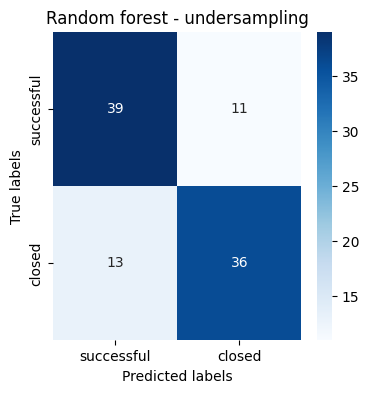

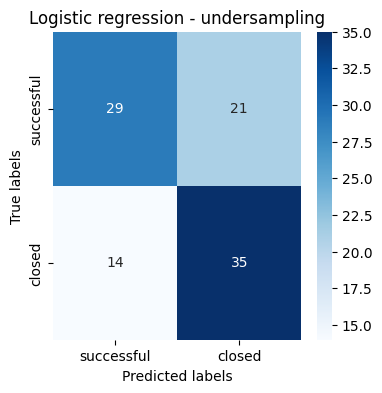

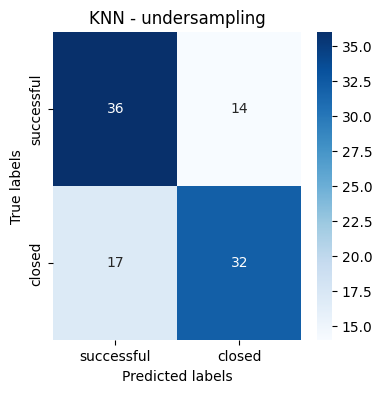

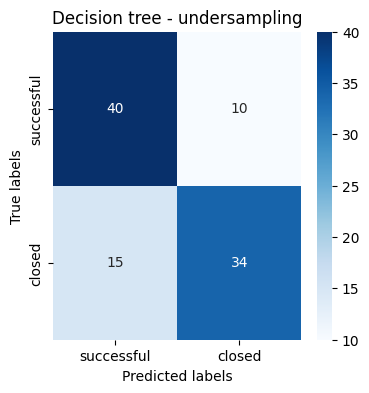

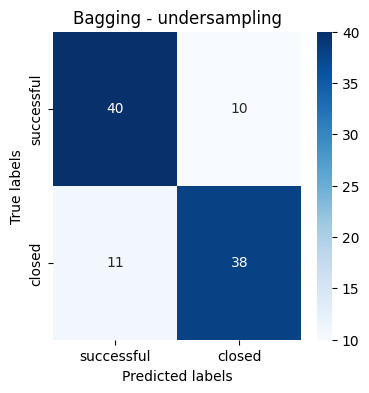

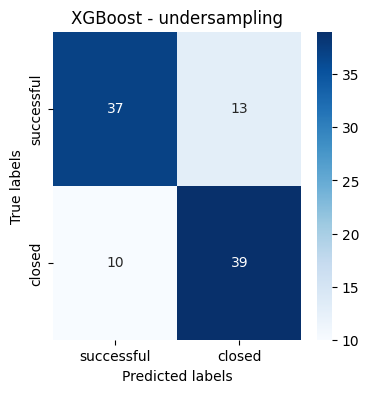

In [42]:
# undersampling
plot_confusion_matrix(y_test_u, y_pred_rnd_forest_u, 'Random forest - undersampling')
plot_confusion_matrix(y_test_u, y_pred_logistic_u, 'Logistic regression - undersampling')
plot_confusion_matrix(y_test_u, y_pred_knn_u, 'KNN - undersampling')
plot_confusion_matrix(y_test_u, y_pred_dt_u, 'Decision tree - undersampling')
plot_confusion_matrix(y_test_u, y_pred_bagg_u, 'Bagging - undersampling')
plot_confusion_matrix(y_test_u, y_pred_xgb_u, 'XGBoost - undersampling')

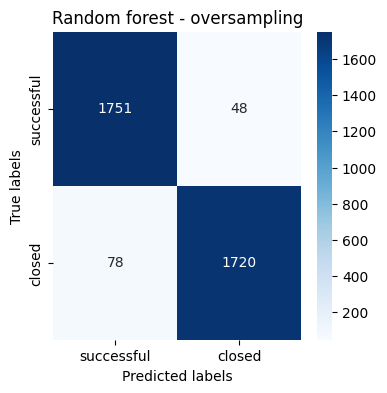

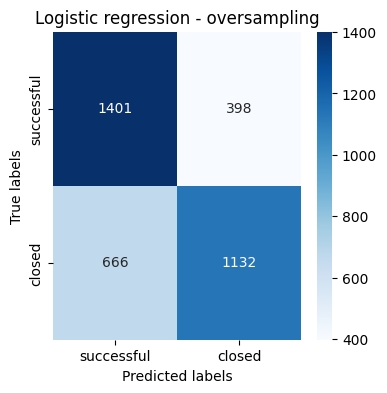

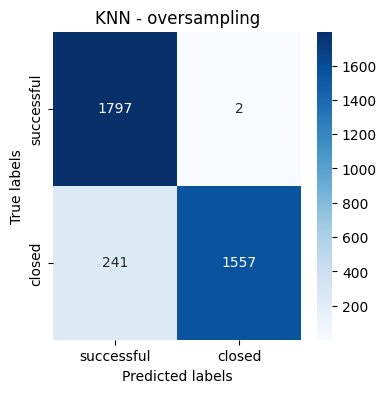

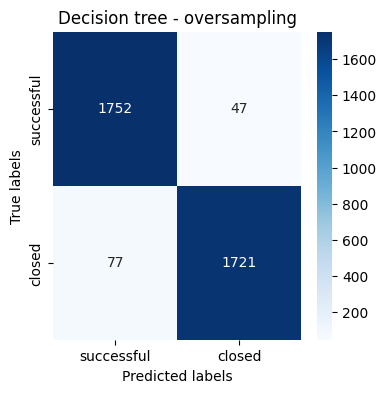

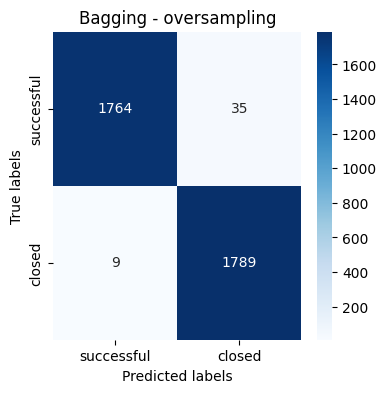

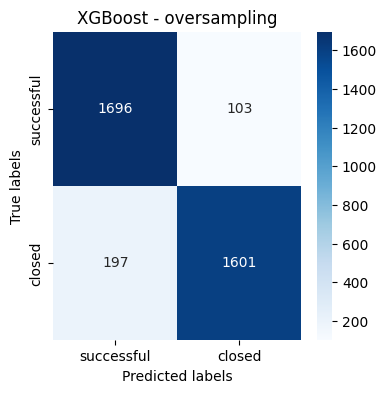

In [43]:
# oversampling
plot_confusion_matrix(y_test_o, y_pred_rnd_forest_o, 'Random forest - oversampling')
plot_confusion_matrix(y_test_o, y_pred_logistic_o, 'Logistic regression - oversampling')
plot_confusion_matrix(y_test_o, y_pred_knn_o, 'KNN - oversampling')
plot_confusion_matrix(y_test_o, y_pred_dt_o, 'Decision tree - oversampling')
plot_confusion_matrix(y_test_o, y_pred_bagg_o, 'Bagging - oversampling')
plot_confusion_matrix(y_test_o, y_pred_xgb_o, 'XGBoost - oversampling')

In [44]:
def plot_algorithm_accuracies(accuracies, dataset_type):
    algorithms = ['Rnd Forest', 'Logistic regr', 'KNN', 'Decision tree', 'Bagging', 'XGBoost']

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(algorithms, accuracies)

    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy of different algorithms - ' + dataset_type)

    fig.subplots_adjust(bottom=0.5)
    plt.show()
    
    data = []
    for i in range(len(algorithms)):
        row = [algorithms[i], round(accuracies[i], 2)]
        data.append(row)

    headers = ['Algorithm', 'Accuracy']

    print(tabulate(data, headers=headers))


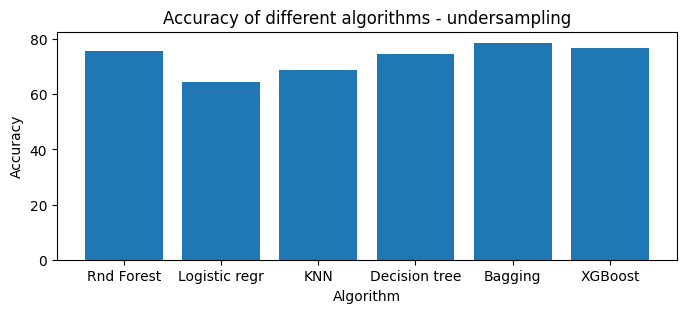

Algorithm        Accuracy
-------------  ----------
Rnd Forest          75.76
Logistic regr       64.65
KNN                 68.69
Decision tree       74.75
Bagging             78.79
XGBoost             76.77


In [45]:
accuracies_u = [acc_rnd_forest_u*100, acc_logistic_u*100, acc_knn_u*100, acc_dt_u*100, acc_bagg_u*100, acc_xgb_u*100]
plot_algorithm_accuracies(accuracies_u, 'undersampling')

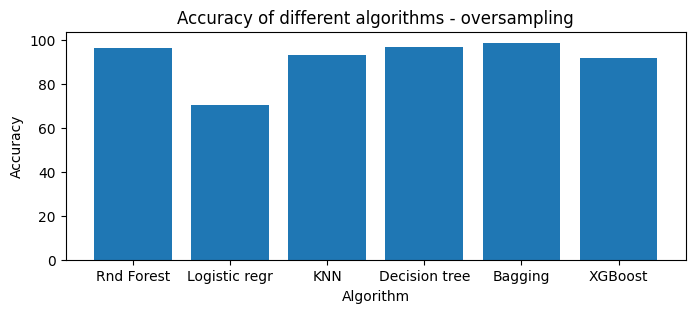

Algorithm        Accuracy
-------------  ----------
Rnd Forest          96.5
Logistic regr       70.42
KNN                 93.24
Decision tree       96.55
Bagging             98.78
XGBoost             91.66


In [46]:
accuracies_o = [acc_rnd_forest_o*100, acc_logistic_o*100, acc_knn_o*100, acc_dt_o*100, acc_bagg_o*100, acc_xgb_o*100]
plot_algorithm_accuracies(accuracies_o, 'oversampling')

## Graficki prikaz precision, recall and F1 score rezultata za manjinsku klasu

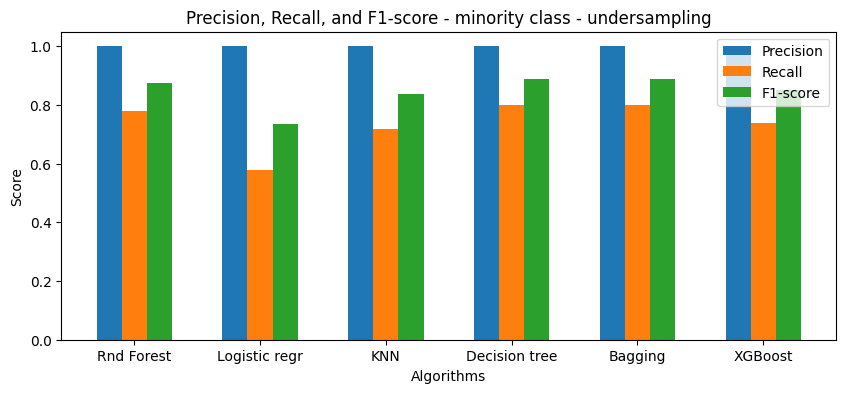

In [47]:
# undersampling
algorithms = ['Rnd Forest', 'Logistic regr', 'KNN', 'Decision tree', 'Bagging', 'XGBoost']
precision_scores = [ precision_rnd_forest_u_minority, 
                    precision_logistic_u_minority, 
                    precision_knn_u_minority, 
                    precision_dt_u_minority, 
                    precision_bagg_u_minority, 
                    precision_xgb_u_minority ]
recall_scores = [ recall_rnd_forest_u_minority, 
                    recall_logistic_u_minority, 
                    recall_knn_u_minority, 
                    recall_dt_u_minority, 
                    recall_bagg_u_minority, 
                    recall_xgb_u_minority ]
f1_scores = [ f1_rnd_forest_u_minority, 
                    f1_logistic_u_minority, 
                    f1_knn_u_minority, 
                    f1_dt_u_minority, 
                    f1_bagg_u_minority, 
                    f1_xgb_u_minority ]

fig, ax = plt.subplots(figsize=(10,4))
bar_width = 0.2
x_pos = np.arange(len(algorithms))

ax.bar(x_pos, precision_scores, width=bar_width, label='Precision')
ax.bar(x_pos + bar_width, recall_scores, width=bar_width, label='Recall')
ax.bar(x_pos + 2*bar_width, f1_scores, width=bar_width, label='F1-score')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-score - minority class - undersampling')

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(algorithms)

ax.legend()

plt.show()


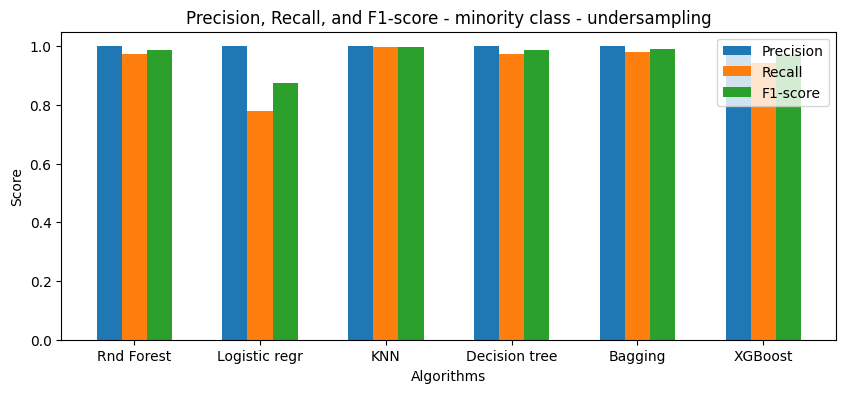

In [48]:
#oversampling
precision_scores = [ precision_rnd_forest_o_minority, 
                    precision_logistic_o_minority, 
                    precision_knn_o_minority, 
                    precision_dt_o_minority, 
                    precision_bagg_o_minority, 
                    precision_xgb_o_minority ]
recall_scores = [ recall_rnd_forest_o_minority, 
                    recall_logistic_o_minority, 
                    recall_knn_o_minority, 
                    recall_dt_o_minority, 
                    recall_bagg_o_minority, 
                    recall_xgb_o_minority ]
f1_scores = [ f1_rnd_forest_o_minority, 
                    f1_logistic_o_minority, 
                    f1_knn_o_minority, 
                    f1_dt_o_minority, 
                    f1_bagg_o_minority, 
                    f1_xgb_o_minority ]

fig, ax = plt.subplots(figsize=(10,4))
bar_width = 0.2
x_pos = np.arange(len(algorithms))

ax.bar(x_pos, precision_scores, width=bar_width, label='Precision')
ax.bar(x_pos + bar_width, recall_scores, width=bar_width, label='Recall')
ax.bar(x_pos + 2*bar_width, f1_scores, width=bar_width, label='F1-score')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-score - minority class - oversampling')

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(algorithms)

ax.legend()

plt.show()